# Free text and natural language processing

A large amount of data in many real-world data sets comes in the form of free text 
(user comments, but also any “unstructured” field).

(Computational) natural language processing: we write computer programs that can 
understand natural language.

This lecture: we will try to get some meaningful information out of unstructured text data.

## Basics of Text Processing

Text processing is a crucial step in preparing textual data for Natural Language Processing (NLP) tasks. It involves transforming raw text into a structured format that can be used effectively by machine learning models.

**Text Cleaning**

- Lowercasing: Converts all characters in the text to lowercase to ensure uniformity.
- Removing Punctuation: Eliminates punctuation marks that do not contribute to the meaning of the text.
- Removing Stopwords: Removes commonly used words (e.g., 'and', 'is', 'in') that do not carry significant meaning.
- Removing Special Characters and Numbers: Eliminates special characters and numbers that are often irrelevant for textual analysis.

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the necessary resources
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in word_tokenize(text) if word not in stop_words)

    return text

sample_text = "Hello! This is an example text with numbers 123 and punctuation!!!"
cleaned_text = clean_text(sample_text)
print(cleaned_text)  # Output: hello example text numbers


**Tokenization**

Tokenization is the process of splitting text into smaller units, typically words or sentences. It helps in breaking down text data into manageable pieces for further processing.

- Word Tokenization: Splits the text into individual words.
- Sentence Tokenization: Splits the text into sentences.


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_text(text):
    
    # Word tokenization
    words = word_tokenize(text)

    # Sentence tokenization
    sentences = sent_tokenize(text)

    return words, sentences

sample_text = "Natural Language Processing (NLP) is exciting! It enables computers to understand human language."
words, sentences = tokenize_text(sample_text)
print("Words:", words)
print("Sentences:", sentences)

**Stemming and Lemmatization**

- Stemming: Reduces words to their base or root form by stripping suffixes (e.g., 'running' becomes 'run'). Stemming may result in non-dictionary words.

- Lemmatization: Reduces words to their base or dictionary form (lemma) while considering the context (e.g., 'running' becomes 'run', but 'better' becomes 'good').

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')

def apply_stemming(text):
    stemmer = PorterStemmer()

    # Tokenize text into words
    words = word_tokenize(text)

    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]

    return stemmed_words

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenize text into words
    words = word_tokenize(text)

    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return lemmatized_words

sample_text = "The children are playing with their toys."
stemmed_words = apply_stemming(sample_text)
lemmatized_words = apply_lemmatization(sample_text)
print("Stemmed Words:", stemmed_words)  # Output: ['the', 'children', 'are', 'play', 'with', 'their', 'toy']
print("Lemmatized Words:", lemmatized_words)  # Output: ['the', 'child', 'are', 'playing', 'with', 'their', 'toy']

**Normalization Techniques**

Normalization techniques standardize text data by reducing it to a uniform format. This can include:

- Handling Synonyms: Converting synonyms to a common representation (e.g., 'car', 'automobile' both become 'car').
- Handling Abbreviations: Expanding abbreviations to their full forms (e.g., 'u' becomes 'you').
- Spelling Correction: Correcting misspelled words.

In [ ]:
from nltk.tokenize import word_tokenize
from autocorrect import Speller

# Download necessary resources
nltk.download('punkt')

def normalize_text(text):
    # Initialize spell checker
    spell = Speller(lang='en')

    # Define a dictionary for common abbreviations
    normalization_dict = {
        "u": "you",
        "ur": "your",
        "r": "are",
        "pls": "please",
        "pos": "please",
        "thx": "thanks"
    }

    # Tokenize text into words
    words = word_tokenize(text.lower())

    # Handle abbreviations, spelling corrections, and remove special characters
    normalized_words = [normalization_dict.get(word, spell(word)) for word in words]

    # Reconstruct the text
    normalized_text = ' '.join(normalized_words)

    # Clean special characters after spelling corrections
    normalized_text = normalized_text.replace('!', '').replace('.', '').strip()

    return normalized_text

sample_text = "U r the best! Pls help me with this assignment. Thx!"
normalized_text = normalize_text(sample_text)
print(normalized_text)

## Basics of NLP

**Understanding language is hard**

Multiple potential parse trees:
“While hunting in Africa, I shot an elephant in my pajamas. How he got into my 
pajamas, I don't know.” – Groucho Marx

Winograd schemas:
“The city council members refused the demonstrators a permit because they 
feared violence.”

*Basic point*: We use an incredible amount of context to understand what natural 
language sentences mean.

**But is it always hard?**

Two reviews for a movie:

> "Barbie is a fun movie that has surprisingly plenty of *heartwarming* moments and *good* messages to offer. The set designs are *eye-catching* and on point as well. Both Margot Robbie and Ryan Gosling nailed their parts, but it is Gosling who mostly shines."

> "It didn't grab me; I didn't find it funny anywhere. It went from the most *annoying* opening to as far as one can get annoying in every second of this film. The music was *shallow*; the production design teetered on Terry Gilliam's work but without the imagination or talent, and old 1920s/1930s film backgrounds and old Three Stooges routines were very *tiring*."

Which one is positive?

We can often very easily tell the “overall gist” of natural language text without 
understanding the sentences at all

**Natural language processing for data science**

- Representing text as a vector (of numbers)
- Measuring distance (or similarity) between vectors
- Language models



## Bag of words model

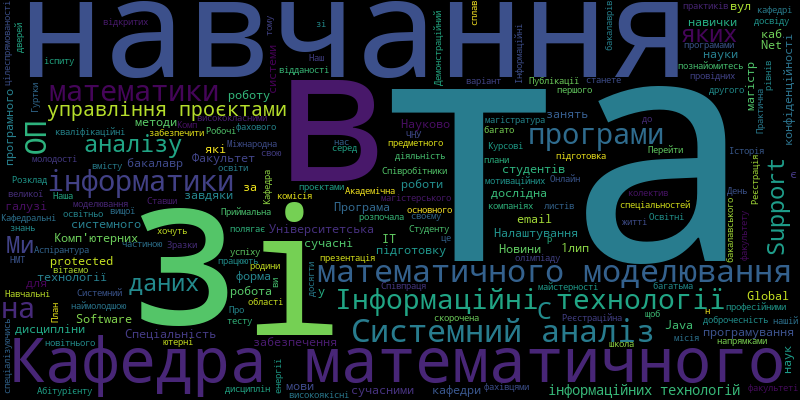

In [2]:
import wordcloud
from bs4 import BeautifulSoup
import requests
import re

response = requests.get("https://mathmod.chnu.edu.ua/")
root = BeautifulSoup(response.content, "lxml")

from wordcloud import WordCloud
wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", root.text))
wc.to_image()

## TFIDF

“Term frequency” just refers to the counts of each word in a document
Denoted $tf_{i, j}=$ frequency of word $j$ in document $i$ (sometimes indices are reversed, 
we use these for consistency with matrix above).

Often (as in the previous slide), this just means the raw count, but there are also 
other possibilities.


In [8]:
documents = [
    "In Inception, the plot unfolds with thrilling action, keeping audiences on edge through a series of intense and unexpected twists.",
    "The story of Inception keeps audiences hooked with its thrilling action and surprising twists, making every moment unforgettable.",
    "The Matrix transformation preserves the vector's direction, illustrating how linear combinations affect the overall system."
]

document_words = [doc.lower().split() for doc in documents]
vocab = sorted(set(sum(document_words, [])))
vocab_dict = {k:i for i,k in enumerate(vocab)}
print(vocab, "\n")
print(vocab_dict, "\n")

['a', 'action', 'action,', 'affect', 'and', 'audiences', 'combinations', 'direction,', 'edge', 'every', 'hooked', 'how', 'illustrating', 'in', 'inception', 'inception,', 'intense', 'its', 'keeping', 'keeps', 'linear', 'making', 'matrix', 'moment', 'of', 'on', 'overall', 'plot', 'preserves', 'series', 'story', 'surprising', 'system.', 'the', 'thrilling', 'through', 'transformation', 'twists,', 'twists.', 'unexpected', 'unfolds', 'unforgettable.', "vector's", 'with'] 

{'a': 0, 'action': 1, 'action,': 2, 'affect': 3, 'and': 4, 'audiences': 5, 'combinations': 6, 'direction,': 7, 'edge': 8, 'every': 9, 'hooked': 10, 'how': 11, 'illustrating': 12, 'in': 13, 'inception': 14, 'inception,': 15, 'intense': 16, 'its': 17, 'keeping': 18, 'keeps': 19, 'linear': 20, 'making': 21, 'matrix': 22, 'moment': 23, 'of': 24, 'on': 25, 'overall': 26, 'plot': 27, 'preserves': 28, 'series': 29, 'story': 30, 'surprising': 31, 'system.': 32, 'the': 33, 'thrilling': 34, 'through': 35, 'transformation': 36, 'twis

Now let’s construct a matrix that contains word counts (term frequencies) for all the documents.

In [9]:
import numpy as np

X_tf = np.zeros((len(documents), len(vocab)), dtype=int)
for i, doc in enumerate(document_words):
    for word in doc:
        X_tf[i, vocab_dict[word]] +=1
        
print(X_tf)

[[1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1
  0 0 1 1 1 0 0 1]
 [0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0
  0 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 3 0 0
  1 0 0 0 0 0 1 0]]


### Inverse document frequency

Term frequencies tend to be “overloaded” with very common words (“the”, “is”, 
“of”, etc). Note: really common words, called “stop words,” may even be removed.

Idea of inverse document frequency weight words negatively in proportion to how 
often they occur in the entire set of documents.s

$idf_{j}=log(\frac{N_{documents}}{N_{documents-with-word-j}} )$

As with term frequency, there are other version as well with different scalings, but 
the log scaling above is most common.

Note that inverse document frequency is just defined for words not for word-document pairs, like term frequency

In [ ]:
idf = np.log(X_tf.shape[0]/X_tf.astype(bool).sum(axis=0))
print(idf)

### TFIDF

Term frequency inverse document frequency $= tf_{i,j} × idf_j$

Just replace the entries in the 𝑋 matrix with their TFIDF score instead of their raw counts 
(also common to remove “stop words” beforehand)



In [11]:
X_tfidf = X_tf * idf
print(X_tfidf)

[[1.09861229 0.         1.09861229 0.         0.40546511 0.40546511
  0.         0.         1.09861229 0.         0.         0.
  0.         1.09861229 0.         1.09861229 1.09861229 0.
  1.09861229 0.         0.         0.         0.         0.
  0.40546511 1.09861229 0.         1.09861229 0.         1.09861229
  0.         0.         0.         0.         0.40546511 1.09861229
  0.         0.         1.09861229 1.09861229 1.09861229 0.
  0.         0.40546511]
 [0.         1.09861229 0.         0.         0.40546511 0.40546511
  0.         0.         0.         1.09861229 1.09861229 0.
  0.         0.         1.09861229 0.         0.         1.09861229
  0.         1.09861229 0.         1.09861229 0.         1.09861229
  0.40546511 0.         0.         0.         0.         0.
  1.09861229 1.09861229 0.         0.         0.40546511 0.
  0.         1.09861229 0.         0.         0.         1.09861229
  0.         0.40546511]
 [0.         0.         0.         1.09861229 0.      

### Cosine Similarity 

$CosineSim(x,y)=\frac{x * y}{||x||_{2}\dot ||y||_{2}}$

Higher numbers mean documents are more similar.

In [12]:
X_tfidf_norm = X_tfidf / np.linalg.norm(X_tfidf, axis=1)[:,None]
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)

[[1.         0.04991504 0.        ]
 [0.04991504 1.         0.        ]
 [0.         0.         1.        ]]


Downsides of TFIDF:

No notion of similarity in term frequency vector space:

$||'Kyiv'-'Zhytomyr'||=||'Kyiv'-'Eggplant'||=1$

But, some words are inherently more related that others

- "Pittsburgh has some excellent new restaurants"
- "Boston is a city with great cuisine"
- "PostgreSQL is a relational database management system"

Under TFIDF cosine similarity (if we don’t remove stop words), then the second two 
sentences are more similar than the first and second

## Word embeddings and word2vec

TFIDF disadvantage - no notion of similarity between words

```
documents = [
    "pittsburgh has some excellent new restaurants",
    "boston is a city with great cuisine",
    "postgresql is a relational database management system"
]
```

To get started with word embeddings, we'll note that words in the term frequency model can also be considered as being represented by vectors; in particular, any word is represented by a "one-hot" vector that has a zero in all the coordinates except a one in the coordinate specified

This discussion brings us to the topic of "*word embeddings*". Like the one-hot encoding of words, a word embedding is a vector representation of words, in some space  $R^{k}$ . That it, for every word in the encoder, the word embedding represents this word with a  k -dimensional vector. There are a few important differences, though:

- Euclidean distances in the word embedding (attempt to) correspond to some notion of similarity between the words.
- The dimensionality of the vector,  k , does not need to be the same as the vocabulary size (typically it is a much smaller fixed dimension, like  k=300).

How do we actually go about creating a word embedding that has these properties, though? We don't yet have enough background to define the algorithms for doing this in detail, but a common approach that has ignited a lot of recent interest in word embeddings is the word2vec algorithm, see Mikolov et al., "Efficient Estimation of Word Representations in Vector Space", Arxiv 2013 and several variants that arose subsequently.

For our purposes, though, the basic idea of word2vec is that, given a large body of text, we want to train an algorithm that can "predict" the context around a word. For example, suppose we have the following sentence somewhere in our corpus that we are building the word2vec model on:

>... eastern US city of Pittsburgh is building new technology centers ...

and

>.. the eastern city of Boston has well-established technology and biotech sectors but ...

From the word "pittsburgh", we would try to predict some of the surrounding words (possibly ignoring stop words), using a "projection" of pittsburgh into a lower dimensional space.

### Properties of word vectors

Let's look at a few properties of the resulting word vectors. To do so, we're going to use the gensim library. Gensim was built as a generic topic modeling library (a subject we'll look at a bit more later in the course), but for one purposes now, one of it's nice features is that it has an interface to pre-trained word embedding models. It also has an optimized implementation of the actual word2vec training algorithm, so in the even that you do have a large enough corpus that has some deviations from standard English (a common example in data science would be free-text comments in some specialized topic area, like notes that a technician may write in some very particular application domain), you can also use the library to train your own model.

Loading the pre-trained models, though, is quite straightforward. We can load the model which is mentioned above using the following code.

In [ ]:
import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import numpy as np
import gensim.downloader as api

model = Word2Vec(lee_corpus_list, vector_size=24, epochs=100)
# model["pittsburgh"][:10]

word_vectors = api.load("glove-wiki-gigaword-100")
vector = word_vectors['computer']

print(vector[:10], '\n')
print(word_vectors.similarity('woman', 'man'), '\n')
print(word_vectors.distance("media", "media"), '\n')

In [ ]:
# TFIDF in Gensim

documents = [
    "pittsburgh has some excellent new restaurants",
    "boston is a city with great cuisine",
    "postgresql is a relational database management system"
]
document_words = [doc.split() for doc in documents]
dictionary = gs.corpora.Dictionary(document_words)
corpus = [dictionary.doc2bow(doc) for doc in document_words]
tfidf = gs.models.TfidfModel(corpus)
X_tfidf = gs.matutils.corpus2csc(tfidf[corpus])
print(X_tfidf.todense().T)

M = gs.similarities.MatrixSimilarity(tfidf[corpus])
print(M.get_similarities(tfidf[corpus]))

**Bag of word vectors**

Now that we have defined a "nicer" representation of words in a vector space, let's see one simple way of using these to compute document similarity that captures the underlying words.  Returning to our previouse example of the three documents (two about food in cities, one about PostgreSQL), we can do the something similar as to did to create the term frequency document vectors (i.e., add up all the word vectors in the document), but this time using the word2vec embeddings instead of the term frequency one-hot vectors:

$$
x{_\mathrm{doc}} = \sum_{\mathrm{word} \in \mathrm{doc}} w_{\mathrm{word}}.
$$

In [ ]:
X_w2v = np.array([sum(word_vectors[w.lower()] for w in doc) for doc in document_words])

X_w2v = X_w2v / np.linalg.norm(X_w2v, axis=1)[:,None]
M = X_w2v @ X_w2v.T
print(M)

## Language models and n-grams